# PRÁTICA INDEPENDENTE - Estatística Descritiva II.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [3]:
#Standard size of figures on this notebook
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100

## Exercício 1 - Função de Probabilidade - [Distribuição Binomial](https://www.investopedia.com/terms/b/binomialdistribution.asp).

\begin{equation*}
f(x)=  \binom {n}{x} (p)^{x} (1-p)^{(n-x)}
\end{equation*}

#### Considere uma variável $ X $, do tipo aleatória aleatória, contendo o número de caras saídas em $ 12 $ lançamentos de uma [moeda honesta](https://en.wikipedia.org/wiki/Fair_coin). Qual a probabilidade de sair $ 5 $ caras em $ 12 $ lançamentos, $P(X = 5)$.

Neste caso, como estou usando a Probability mass function (pmf), estou calculando a probabilidade de sair EXATAMENTE 5 caras em 12 lançamentos de uma moeda justa.

In [62]:
probabilidade_cara = stats.binom.pmf(k=5, n=12, p=0.5)

# Onde k = quantidade do evento desejado (sair cara) ocorrer
# n = numero total de lançamentos
# p = probabilidade do evento desejado ocorrer em cada lançamento

print(f'Probabilidade de sair EXATAMENTE 5 caras em 12 lançamentos de uma moeda justa: {round(probabilidade_cara, 2) * 100}%')

Probabilidade de sair EXATAMENTE 5 caras em 12 lançamentos de uma moeda justa: 19.0%


Se eu quiser calcular a probabilidade de sair ATÉ 5 caras em doze lançamentos eu uso a Cumulative distribution function.

In [63]:
print(f'Probabilidade de sair ATÉ 5 caras em 12 lançamentos de uma moeda justa: {round(stats.binom.cdf(k=5, n=12, p=0.5), 2) * 100}%')

Probabilidade de sair ATÉ 5 caras em 12 lançamentos de uma moeda justa: 39.0%


## Exercício 2 - Função de Probabilidade - [Distribuição de Poisson](https://www.investopedia.com/terms/p/poisson-distribution.asp).

\begin{equation*}
f(x)= e^{-\lambda} \dfrac{\lambda^{x}}{x!}
\end{equation*}

#### Imagine um pronto socorro que realiza em média $ 5 $ atendimentos por hora.  Qual  a  probabilidade  dele  realizar  $ 2 $ atendimentos a qualquer momento aleatório? 

In [64]:
print(f'Probabilidade de 2 atendimentos aleatórias com a media de 5 atendimentos por hora: {round(stats.poisson.pmf(k= 2, mu= 5), 2) * 100}%')

Probabilidade de 2 atendimentos aleatórias com a media de 5 atendimentos por hora: 8.0%


## Exercício 3 - [Função de Probabilidade](https://www.investopedia.com/terms/p/probabilitydistribution.asp).

#### (Meyer,2000) Suponha que $ X_{t} $, o nº de partículas emitidas em $ t $  horas por uma fonte radioativa, tenha uma distribuição de Poisson com parâmetro $20 t $. Qual será a probabilidade de que exatamente $ 5 $  partículas sejam emitidas durante um período de $ 15 $ min?

In [65]:
parametro_uma_hora = 20
parametro_quinze_minutos = parametro_uma_hora * (1 / 4) # 15 minutos equivale a 1/4 de hora
parametro_quinze_minutos

5.0

In [66]:
probabilidade = round(stats.poisson.pmf(k= 5, mu= parametro_quinze_minutos), 2) * 100

In [67]:
print(f'Probabilidade de exatamente 5 partículas em 15 minutos:{probabilidade}%')

Probabilidade de exatamente 5 partículas em 15 minutos:18.0%


## Exercício 4 - [Distribuição Normal](https://www.investopedia.com/terms/n/normaldistribution.asp).

#### Gere uma distribuição normal com o peso da população; tome como média $70$ kg, como desvio padrão de $25$ kg e $ 100 $ observações e plote a Função Densidade de Probabilidade (PDF).

In [68]:
# Generating normal distribution with numpy
normal_distribution = np.random.normal(loc= 70, scale = 25,
              size = 100)
# Mean of the distribution
mean = round(normal_distribution.mean(), 2)

# Standard deviation of the distribution
sd = round(normal_distribution.std(), 2)

Using [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

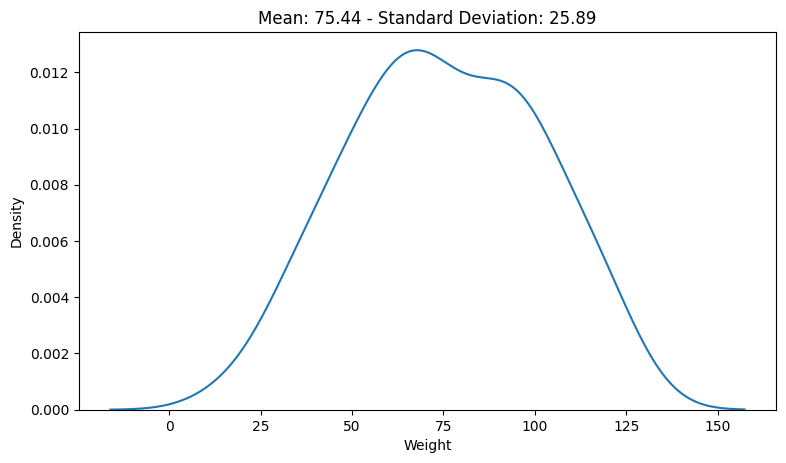

In [69]:
ax = sns.kdeplot(normal_distribution)

ax.set_title(f'Mean: {mean} - Standard Deviation: {sd}')

ax.set_xlabel('Weight')

ax.set_ylabel('Density');

Using [distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html)

            Mean: 75.44 - Standard Deviation: 25.89


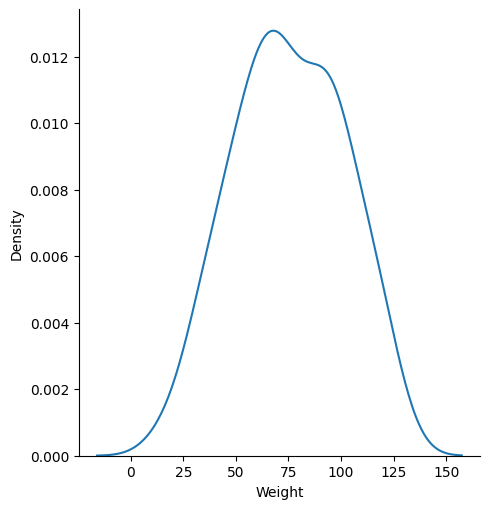

In [70]:
ax2 = sns.displot(normal_distribution, kind= 'kde')

print(f'            Mean: {mean} - Standard Deviation: {sd}')

ax2.set_xlabels('Weight');

## Exercício 5 - [Normalização](https://www.investopedia.com/terms/z/zscore.asp)


#### Normalize a distribuição anterior com [z-score](https://towardsdatascience.com/the-surprising-longevity-of-the-z-score-a8d4f65f64a0)

\begin{equation*}
Z \sim \dfrac{x - \mu} {\sigma^{2}\,}
\end{equation*}

#### Tente realizar essa tarefa através de um método explícito, de uma função definida, com o auxílio da função [`lambda`](https://docs.python.org/3/reference/expressions.html#lambda) e com o método [`Sklearn.Preprocessing()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

#### Método explícito:

In [71]:
z_scores = list()

for x in normal_distribution:
    z_scores.append((x - mean) / sd)

z_scores[:3] 

[0.6336757570377465, 0.3596106475847312, -0.633148798697793]

#### Definindo uma função:

In [72]:
def get_z_scores_of_a_distribution(distribution):
  
  mean = distribution.mean() # Get the mean of the distribution
  
  sd = distribution.std() # Get the standard deviation of the distribution
  
  z_score_list = [(x - mean) / sd for x in distribution] # Calculate the z_scores of the distribution

  return z_score_list

In [73]:
get_z_scores_of_a_distribution(normal_distribution)[:3]

[0.6334757148691841, 0.359453535030638, -0.6331504052103674]

#### Utilizando função `Lambda`:

In [74]:
z_score_list = [(x - mean) / sd for x in normal_distribution]
z_score_list[:3]

[0.6336757570377465, 0.3596106475847312, -0.633148798697793]

#### Utilizando `Sklearn.Preprocessing`:

In [75]:
from sklearn.preprocessing import StandardScaler

In [77]:
#Creating StandardScaler object
scaler = StandardScaler()

#Reshaping the normal distribution
x = normal_distribution.reshape(-1, 1)

#Calculating the z_scores of the distribution
z_scores = scaler.fit_transform(x)

#Showing the first three z_scores of the distribution
z_scores[:3]

array([[ 0.63347571],
       [ 0.35945354],
       [-0.63315041]])

Showing the distribution

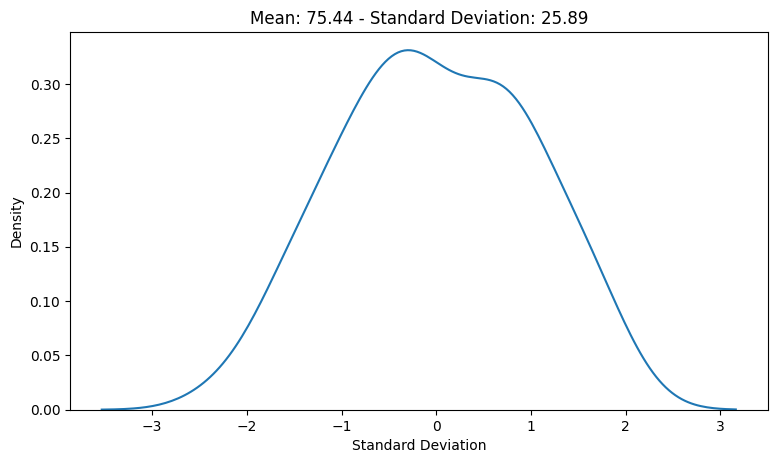

In [78]:
ax3 = sns.kdeplot(z_score_list)

ax3.set_title(f'Mean: {mean} - Standard Deviation: {sd}')

ax3.set_xlabel('Standard Deviation')

ax3.set_ylabel('Density');